<a href="https://colab.research.google.com/github/Yahred/evolutionary-computation/blob/main/EAFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos genéticos: Ejemplo aproximando una función

Instalamos las bibliotecas necesarias

In [1]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.9 MB/s eta 0:00:00


In [13]:
import random
import array
import random
import math
import matplotlib.pyplot as plt

import numpy as np
from deap import base, creator, tools, algorithms

In [74]:
y_puntos = [-9.47530499, -8.20053076, -7.06007355, -6.07004795, -5.27138796, -4.66909356, -4.19457453, -3.84919918, -3.65942874, -3.55181112, -3.51373936, -3.57264491, -3.64987936, -3.70235606, -3.740946, -3.77725596, -3.69827274, -3.61302712, -3.41808667, -3.08308666, -2.70158321, -2.22867037, -1.6511668, -1.03678599, -0.38456232, 0.33075079, 1.02477883, 1.73094186, 2.36205994, 2.95806084, 3.4237866, 3.82636692, 4.13496303, 4.27157043, 4.29493587, 4.17829624, 3.95409283, 3.56992402, 3.12288977, 2.54601402, 1.91026026, 1.22867569, 0.5422082, -0.15349255, -0.811973, -1.42121758, -1.95555196, -2.40673855, -2.74191681, -2.9531929, -3.02569868, -2.96935198, -2.8077883, -2.51352989, -2.1299076, -1.63410109, -1.10580826, -0.51745204, 0.10152695, 0.72202862, 1.30413158, 1.86537205, 2.32219095, 2.72308679, 3.03966672, 3.25492871, 3.40087177, 3.39878705, 3.35382379, 3.21714617, 3.03930083, 2.80648229, 2.55612964, 2.37850053, 2.17973998, 2.08049234, 2.03455593, 2.11668995, 2.36365782, 2.70136088, 3.20906666, 3.88418985, 4.75685859, 5.73009392, 6.89142106, 8.19980283, 9.64580405, 11.17160365, 12.77006736, 14.48209584, 16.1949218, 17.94359567, 19.65124253, 21.36240072, 23.01681852, 24.63925159, 26.20180742, 27.69009341, 29.13518722, 30.54860084]
x_puntos = [-2.0, -1.95959596, -1.91919192, -1.87878788, -1.83838384,
            -1.7979798, -1.75757576, -1.71717172, -1.67676768, -1.63636364,
            -1.5959596, -1.55555556, -1.51515152, -1.47474747, -1.43434343,
            -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
            -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
            -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
            -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
            -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
            -0.38383838, -0.34343434, -0.3030303, -0.26262626, -0.22222222,
            -0.18181818, -0.14141414, -0.1010101, -0.06060606, -0.02020202,
             0.02020202, 0.06060606, 0.1010101, 0.14141414, 0.18181818,
             0.22222222, 0.26262626, 0.3030303, 0.34343434, 0.38383838,
             0.42424242, 0.46464646, 0.50505051, 0.54545455, 0.58585859,
             0.62626263, 0.66666667, 0.70707071, 0.74747475, 0.78787879,
             0.82828283, 0.86868687, 0.90909091, 0.94949495, 0.98989899,
             1.03030303, 1.07070707, 1.11111111, 1.15151515, 1.19191919,
             1.23232323, 1.27272727, 1.31313131, 1.35353535, 1.39393939,
             1.43434343, 1.47474747, 1.51515152, 1.55555556, 1.5959596,
             1.63636364, 1.67676768, 1.71717172, 1.75757576, 1.7979798,
             1.83838384, 1.87878788, 1.91919192, 1.95959596, 2.0]

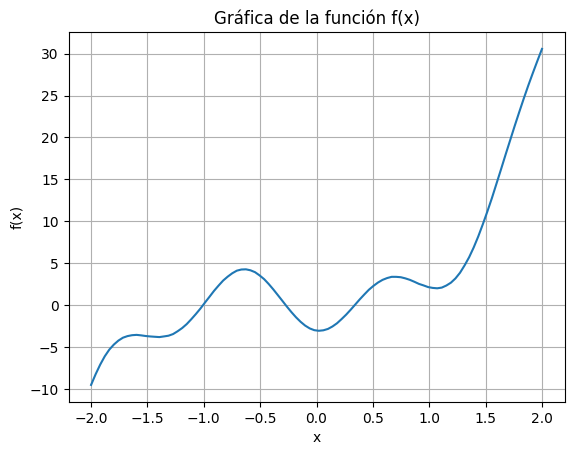

In [73]:
plt.plot(x_puntos, y_puntos)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función f(x)')
plt.grid(True)
plt.show()

Definimos lso parametros de nuestro algoritmo


In [72]:
generaciones = 500
tamaño_poblacion = 100
longitud_cromosoma = 5
objetivo = 3
tamaño_torneo = 3
poblacion = []
puntos_criticos = []

In [47]:
def f(x):
  return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

Definimos la función de aptitud

In [79]:
def fitness(individuo: list[int]):
    a, b, c, d, e = individuo

    def funcion(x):
      return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

    aprox = [funcion(x) for x in x_puntos]
    error = np.sum((np.array(y_puntos) - np.array(aprox))**2)

    return error,

Configuramos la evolución

In [86]:
# Configuración de DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_float", random.uniform, -10, 10)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, longitud_cromosoma)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=tamaño_torneo)

Iniciamos la evolución

In [90]:
random.seed(64)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

pop, log = algorithms.eaMuPlusLambda(pop, toolbox, cxpb=0.7,  mu=10, lambda_=40, mutpb=0.2, ngen=40, halloffame=hof, verbose=True)

ganador = tools.selBest(pop, k=1)[0]

gen	nevals
0  	300   
1  	23    
2  	30    
3  	27    
4  	32    
5  	29    
6  	34    
7  	27    
8  	22    
9  	26    
10 	23    
11 	29    
12 	31    
13 	28    
14 	26    
15 	29    
16 	26    
17 	34    
18 	28    
19 	29    
20 	26    
21 	26    
22 	34    
23 	28    
24 	25    
25 	29    
26 	30    
27 	23    
28 	31    
29 	24    
30 	31    
31 	22    
32 	31    
33 	28    
34 	23    
35 	31    
36 	32    
37 	29    
38 	26    
39 	27    
40 	28    


In [91]:
ganador

[4.767266434578984,
 2.213131056454454,
 6.697376965794328,
 0.3609451283061468,
 -8.743229149078308]

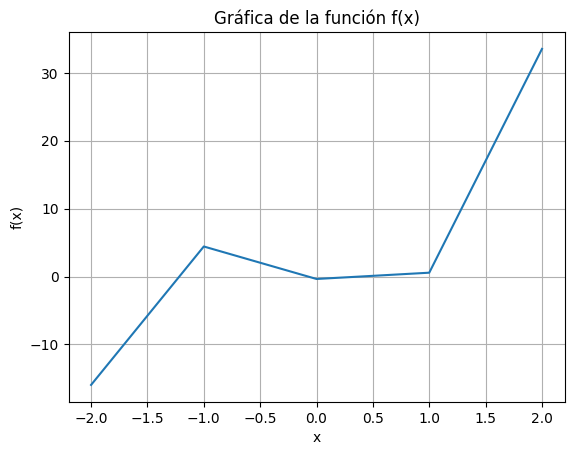

In [92]:
a, b, c, d, e = ganador

def f(x):
  return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

x = range(-2, 3)

y = [f(x_val) for x_val in x]

# Grafica la función
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función f(x)')
plt.grid(True)
plt.show()